<div style="text-align: center; font-size: 2em; color: lightblue; font-weight: bold;"> Wellbeing at Trinity Christian College: A Machine Learning Analysis of Survey Data </div>

<span style="color: #4682B4; font-weight: bold;">1. Introductory paragraph</span>

Trinity Christian College is a small private liberal arts college in Palos Heights, Illinois known for its close knit community, strong academic programs, and faith and service. They invited students, faculty, and staff to take part in a voluntary study to aim to understand the overall wellbeing on Trinity's campus. The survey asked students about their mental health, disabilities, how involved they are in campus activities, and whether they participate in events. Faculty and staff answered another set of questions giving their perspectives on the overall wellbeing of the college community. With this we will be able to answer the question: **Which factors (demographics, mental health, disabilities, or participation) in campus activities are linked to overall wellbeing in Trinity’s students, faculty, and staff?** This project will first give an overview of the people who took the survey and their basic demographics. It will look at how mental health and disabilities relate to wellbeing and it will examine how participating in campus activities influences overall wellbeing at Trinity. By looking at all these factors together we can better understand what helps students, faculty, and staff feel their best and succeed as individuals and as a community.

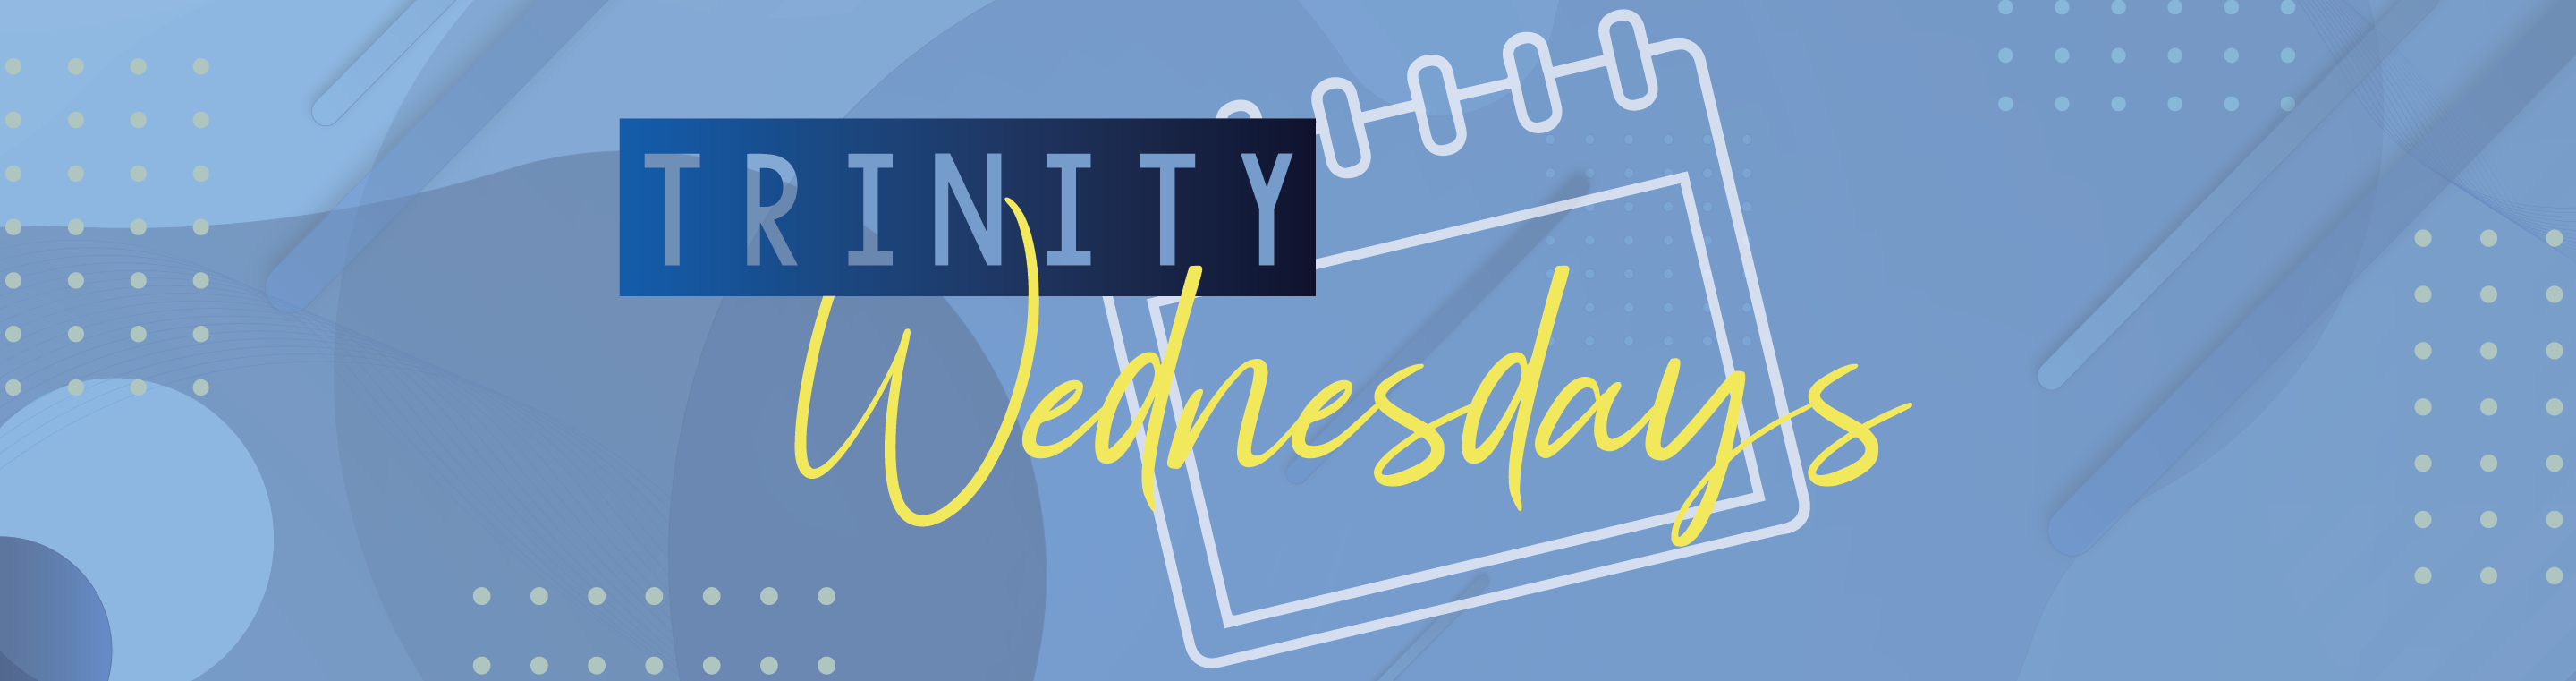



<span style="color: #4682B4; font-weight: bold;">2. Data source information</span>

The data for this study comes from surveys administered to students, faculty, and staff at Trinity Christian College by Dr. Jessica Clevering and her co-investigators. Participants voluntarily shared information about their demographics, wellbeing, participation in campus activities, and opinions about institutional wellbeing. The data collection process is considered reliable and trustworthy because it follows ethical guidelines under the supervision of the college’s Institutional Review Board which makes sure that all responses are anonymous and confidential. This helps protect participants and adds credibility to the dataset. For students, the dataset includes detailed demographic information, self-reported measures of wellbeing, and records of involvement in a variety of campus activities. For faculty and staff, it captures their perspectives on institutional wellbeing, including aspects related to campus culture, support, and engagement. Together, this information provides a broad and detailed view of the experiences and wellbeing of different groups within the college community. While the dataset is quantitative qualitative responses could offer insight into individual experiences and perceptions. The dataset overall contains the perfect information needed to study trends in wellbeing and engagement at Trinity Christian College. It allows for comparisons across students, faculty, and staff and provides a solid foundation for understanding how different groups experience and contribute to the wellbeing of the college community.

We added our dataset to the notebook and imported it using pandas read_csv() method so that we could view and work with the data.

In [22]:
import pandas as pd
data = pd.read_csv('TrinityWellbeingData.csv')
data

,"Informed Consent Information Principal Investigator: Dr. Jessica Clevering Co-Investigators: Myleigh Halmon, Gianna Rizzone, and Wynter O’SullivanFor Students: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, questions about disabilities and mental health, measures of wellbeing, participation in campus activities, and use of Wellbeing Wednesdays. It will likely take about 15 minutes to complete the survey.For Faculty and Staff: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, measures of wellbeing, and your view on institutional wellbeing. It will likely take about 15 minutes to complete the survey. The risks associated with this research are no greater than what you may encounter in everyday life. There are no anticipated personal benefits of participating in this research (other than the chance to win a Visa gift card). Participating in this research is completely voluntary. You may skip any questions. You will not be penalized in any way if you choose not to participate. Your participation in this research is anonymous. IP addresses will not be downloaded, and names will not be collected. If you choose to submit your name for the Visa gift card drawing, your name will not be connected to data. All data will be kept safe in password-protected institutional cloud drives. If you have any questions, you may contact Dr. Jessica Clevering at 708-239-3962 or Jessica.Clevering@trnty.edu. You may also contact Trinity Christian College’s human subjects review board at IRB@trnty.edu. By clicking the box below you acknowledge that you are at least 18 years old and have read and understood the information provided in this consent form.",How would you describe yourself?,What is your age?,What is the highest level of education you have completed?,"Overall, how satisfied are you with life as a whole these days?","In general, I consider myself a happy person.","In general, how would you rate your physical health?",How would you rate your overall mental health?,"Overall, to what extent do you feel the things you do in your life are worthwhile?",I am doing things now that will help me achieve my goals in life.,...,The college has structures and practices so as to be able to sustain itself.,The college has structures and practices that allow it to accomplish its goal.,Everyone is satisfied with the way things are in our college.,Everyone thinks that this college is a good community to be a part of.,Each person has a sense of belonging in the college.,There is a sense of welcome in the college so that it is possible for each person to become more integrated over time.,Our college’s shared purpose or mission is clear to everyone.,Our college contributes to the world to make it a better place.,Everyone is needed for the college to fulfil its goals and purposes.,Our college is able to do more with everyone together than we could individually.
0,I know that being in this study is voluntary a...,Male,22.0,An associate degree,8.0,7.0,7.0,7.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I know that being in this study is voluntary a...,Female,20.0,Some college but no degree,7.0,7.0,6.0,5.0,8.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I know that being in this study is voluntary a...,Female,19.0,Some college but no degree,6.0,8.0,9.0,8.0,8.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I know that being in this study is voluntary a...,Female,22.0,Some college but no degree,8.0,8.0,7.0,6.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I know that being in

<span style="color: #4682B4; font-weight: bold;">3. Data cleaning</span>

I now went ahead and used **"data.info()"** because it shows a summary of the dataset. This will include things such as column names, data types, and any missing values. This makes us more familar with what we will be working with

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 37 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [24]:
data.isnull().sum()

Informed Consent Information  Principal Investigator: Dr. Jessica Clevering Co-Investigators: Myleigh Halmon, Gianna Rizzone, and Wynter O’SullivanFor Students: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, questions about disabilities and mental health, measures of wellbeing, participation in campus activities, and use of Wellbeing Wednesdays. It will likely take about 15 minutes to complete the survey.For Faculty and Staff: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, measures of wellbeing, and your view on inst

Above you can see that we used **"data.isnull().sum()"** this checks for missing values in the dataframe . The **isnull()** part marks each cell as True if it is missing and False if it is not. **The sum()** part adds up the True values for each column, showing the total number of missing values per column.

In [26]:
data_clean = data[data['Are you a student, staff member, or faculty member at Trinity?'].notna()]

students_clean = data_clean[data_clean['Are you a student, staff member, or faculty member at Trinity?'].str.strip() == 'Student']
staff_clean    = data_clean[data_clean['Are you a student, staff member, or faculty member at Trinity?'].str.strip() == 'Staff']
faculty_clean  = data_clean[data_clean['Are you a student, staff member, or faculty member at Trinity?'].str.strip() == 'Faculty']


In this case I decided to split the dataset into three separate groups those being Students, Staff, and Faculty because some survey questions are only relevant to certain groups. To make sure the data was clean, I first removed any rows where the role question was left blank using **notna()** since working with missing values could cause errors when processing the text. After that, I filtered the cleaned dataset into three separate datasets this approach will help me analyze each group making sure that the responses I look at are relevant helping improve the accuracy and clarity of the analysis.

<span style="color: #4682B4; font-weight: bold;">4. Feature selection</span>

Now we will begin to dive deeper and remove features we don’t need to focus on within each category of students, faculty and staff.

In [27]:
import numpy as np

Above we used **import numpy as np** to load the NumPy math library the your Python program. Importing is important because it gives a fast tool for numerical computations and array operations that plain Python cannot handle. It also gives access to a range of mathematical functions and is compatible with other data science libraries.

In the steps below, I reduced the datasets **students_clean**, **staff_clean**, and **faculty_clean** by keeping only the survey questions that were relevant to each group. I first created lists called **columns_kept**, **columns_kept2**, and **columns_kept3** these contain the names of the relevant columns for each category. These lists were then used to filter the datasets making simpler tables that include only the selected survey questions.

In [28]:
columns_kept = [
    "How would you describe yourself?",
    "What is your age?",
    "What is the highest level of education you have completed?",
    "Overall, how satisfied are you with life as a whole these days?\xa0\xa0\xa0\xa0",
    "In general, I consider myself a happy person.",
    "In general, how would you rate your physical health?",
    "How would you rate your overall mental health? \xa0\xa0",
    "Overall, to what extent do you feel the things you do in your life are worthwhile?",
    "I am doing things now that will help me achieve my goals in life.",
    "I always act to promote good in all circumstances, even in difficult and challenging situations.",
    "I am always able to give up some happiness now for greater happiness later.",
    "I am content with my friendships and relationships.",
    "I have people in my life I can talk to about things that really matter.",
    "My family has enough money to live a truly decent life.",
    "How often do you worry about safety, food, or housing?",
    "Are you a student, staff member, or faculty member at Trinity?"
]

students_clean = students_clean[columns_kept].dropna()
students_clean


,How would you describe yourself?,What is your age?,What is the highest level of education you have completed?,"Overall, how satisfied are you with life as a whole these days?","In general, I consider myself a happy person.","In general, how would you rate your physical health?",How would you rate your overall mental health?,"Overall, to what extent do you feel the things you do in your life are worthwhile?",I am doing things now that will help me achieve my goals in life.,"I always act to promote good in all circumstances, even in difficult and challenging situations.",I am always able to give up some happiness now for greater happiness later.,I am content with my friendships and relationships.,I have people in my life I can talk to about things that really matter.,My family has enough money to live a truly decent life.,"How often do you worry about safety, food, or housing?","Are you a student, staff member, or faculty member at Trinity?"
0,Male,22.0,An associate degree,8.0,7.0,7.0,7.0,8.0,8.0,7.0,6.0,7.0,7.0,7.0,8.0,Student
1,Female,20.0,Some college but no degree,7.0,7.0,6.0,5.0,8.0,9.0,9.0,8.0,8.0,9.0,7.0,9.0,Student
2,Female,19.0,Some college but no degree,6.0,8.0,9.0,8.0,8.0,10.0,9.0,8.0,9.0,8.0,9.0,10.0,Student
3,Female,22.0,Some college but no degree,8.0,8.0,7.0,6.0,6.0,9.0,7.0,7.0,8.0,10.0,10.0,2.0,Student
4,Male,22.0,High school diploma or equivalent,9.0,9.0,8.0,8.0,8.0,9.0,7.0,5.0,8.0,9.0,9.0,10.0,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,Female,20.0,High school diploma or equivalent,8.0,6.0,10.0,5.0,6.0,9.0,9.0,10.0,9.0,9.0,8.0,5.0,Student
448,Female,19.0,High school diploma or equivalent,7.0,7.0,6.0,7.0,8.0,8.0,8.0,9.0,8.0,10.0,7.0,10.0,Student
449,Female,20.0,Some college but no degree,8.0,10.0,10.0,8.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,Student
450,Female,34.0,An associate degree,10.0,10.0,6.0,6.0,9.0,10.0,10.0,10.0,10.0,10.0,8.0,6.0,Student


In [29]:
columns_kept2 = [
    "How would you describe yourself?",
    "What is your age?",
    "What is the highest level of education you have completed?",
    "Overall, how satisfied are you with life as a whole these days?\xa0\xa0\xa0\xa0",
    "In general, I consider myself a happy person.",
    "In general, how would you rate your physical health?",
    "How would you rate your overall mental health? \xa0\xa0",
    "Overall, to what extent do you feel the things you do in your life are worthwhile?",
    "I am doing things now that will help me achieve my goals in life.",
    "I always act to promote good in all circumstances, even in difficult and challenging situations.",
    "I am always able to give up some happiness now for greater happiness later.",
    "I am content with my friendships and relationships.",
    "I have people in my life I can talk to about things that really matter.",
    "My family has enough money to live a truly decent life.",
    "How often do you worry about safety, food, or housing?",
    "Are you a student, staff member, or faculty member at Trinity?"
]

staff_clean = staff_clean[columns_kept2].dropna()
staff_clean



,How would you describe yourself?,What is your age?,What is the highest level of education you have completed?,"Overall, how satisfied are you with life as a whole these days?","In general, I consider myself a happy person.","In general, how would you rate your physical health?",How would you rate your overall mental health?,"Overall, to what extent do you feel the things you do in your life are worthwhile?",I am doing things now that will help me achieve my goals in life.,"I always act to promote good in all circumstances, even in difficult and challenging situations.",I am always able to give up some happiness now for greater happiness later.,I am content with my friendships and relationships.,I have people in my life I can talk to about things that really matter.,My family has enough money to live a truly decent life.,"How often do you worry about safety, food, or housing?","Are you a student, staff member, or faculty member at Trinity?"
25,Female,57.0,A bachelor’s degree,8.0,9.0,8.0,9.0,9.0,7.0,9.0,9.0,9.0,10.0,10.0,10.0,Staff
29,Female,22.0,A bachelor’s degree,10.0,10.0,10.0,10.0,10.0,9.0,8.0,9.0,9.0,10.0,8.0,7.0,Staff
33,Female,35.0,A postgraduate degree (such as a master’s degr...,7.0,7.0,6.0,5.0,10.0,8.0,10.0,8.0,6.0,10.0,8.0,10.0,Staff
36,Female,63.0,A bachelor’s degree,7.0,8.0,6.0,7.0,8.0,8.0,8.0,7.0,9.0,9.0,8.0,5.0,Staff
37,Female,25.0,A bachelor’s degree,8.0,7.0,9.0,5.0,10.0,10.0,9.0,7.0,8.0,10.0,5.0,9.0,Staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Female,50.0,A postgraduate degree (such as a master’s degr...,8.0,9.0,8.0,7.0,9.0,8.0,8.0,8.0,9.0,10.0,8.0,10.0,Staff
369,Female,23.0,A bachelor’s degree,7.0,9.0,5.0,6.0,7.0,6.0,5.0,5.0,7.0,8.0,8.0,6.0,Staff
381,Female,29.0,A bachelor’s degree,8.0,8.0,8.0,7.0,9.0,7.0,9.0,7.0,7.0,10.0,5.0,8.0,Staff
410,Male,48.0,An associate degree,9.0,8.0,6.0,9.0,9.0,8.0,8.0,7.0,9.0,10.0,6.0,8.0,Staff


In [30]:
columns_kept3 = [
    "How would you describe yourself?",
    "What is your age?",
    "What is the highest level of education you have completed?",
    "Overall, how satisfied are you with life as a whole these days?\xa0\xa0\xa0\xa0",
    "In general, I consider myself a happy person.",
    "In general, how would you rate your physical health?",
    "How would you rate your overall mental health? \xa0\xa0",
    "Overall, to what extent do you feel the things you do in your life are worthwhile?",
    "I am doing things now that will help me achieve my goals in life.",
    "I always act to promote good in all circumstances, even in difficult and challenging situations.",
    "I am always able to give up some happiness now for greater happiness later.",
    "I am content with my friendships and relationships.",
    "I have people in my life I can talk to about things that really matter.",
    "My family has enough money to live a truly decent life.",
    "How often do you worry about safety, food, or housing?",
    "Are you a student, staff member, or faculty member at Trinity?"
]

faculty_clean = faculty_clean[columns_kept3].dropna()
faculty_clean 


,How would you describe yourself?,What is your age?,What is the highest level of education you have completed?,"Overall, how satisfied are you with life as a whole these days?","In general, I consider myself a happy person.","In general, how would you rate your physical health?",How would you rate your overall mental health?,"Overall, to what extent do you feel the things you do in your life are worthwhile?",I am doing things now that will help me achieve my goals in life.,"I always act to promote good in all circumstances, even in difficult and challenging situations.",I am always able to give up some happiness now for greater happiness later.,I am content with my friendships and relationships.,I have people in my life I can talk to about things that really matter.,My family has enough money to live a truly decent life.,"How often do you worry about safety, food, or housing?","Are you a student, staff member, or faculty member at Trinity?"
7,Male,44.0,A postgraduate degree (such as a master’s degr...,6.0,7.0,8.0,7.0,8.0,8.0,8.0,8.0,8.0,10.0,9.0,7.0,Faculty
14,Female,41.0,A postgraduate degree (such as a master’s degr...,9.0,9.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,Faculty
18,Male,36.0,A postgraduate degree (such as a master’s degr...,7.0,9.0,8.0,7.0,9.0,8.0,8.0,7.0,4.0,3.0,7.0,9.0,Faculty
20,Male,39.0,A postgraduate degree (such as a master’s degr...,9.0,8.0,7.0,8.0,9.0,9.0,8.0,9.0,9.0,8.0,7.0,10.0,Faculty
51,Male,38.0,A postgraduate degree (such as a master’s degr...,5.0,5.0,7.0,7.0,9.0,9.0,9.0,9.0,10.0,10.0,10.0,9.0,Faculty
80,Female,43.0,A postgraduate degree (such as a master’s degr...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,10.0,Faculty
93,Male,44.0,A postgraduate degree (such as a master’s degr...,8.0,7.0,8.0,7.0,7.0,7.0,6.0,9.0,7.0,10.0,10.0,0.0,Faculty
104,Female,71.0,A postgraduate degree (such as a master’s degr...,7.0,6.0,9.0,9.0,8.0,8.0,9.0,8.0,7.0,10.0,6.0,10.0,Faculty
114,Female,43.0,A postgraduate degree (such as a master’s degr...,9.0,9.0,3.0,7.0,9.0,9.0,9.0,8.0,8.0,9.0,8.0,10.0,Faculty
144,Female,42.0,A postgraduate degree (such as a master’s degr...,7.0,9.0,4.0,5.0,8.0,10.0,6.0,4.0,8.0,10.0,10.0,9.0,Faculty


<span style="color: #4682B4; font-weight: bold;">5. Model selection and tuning</span>

Since we have three groups those being students, faculty, staff. I went ahead and grouped the people who answered the survey similarly. That’s called clustering. We’ll try two clustering methods. The first will be **K-Means** which is where it groups people based on “distance” in answers. Secondly will be **Hierarchical** which makes a “tree” of people based on similarity, then cuts the tree to get clusters.

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA

This code brings in tools for clustering and plotting data. Matplotlib (plt) and Seaborn (sns) make graphs. StandardScaler scales data so all features are comparable. KMeans groups similar data points, and silhouette_score checks how clear the clusters are. The scipy functions (linkage, dendrogram, fcluster) do hierarchical clustering, showing clusters as a tree. PCA reduces many features to just a few so we can see the data more easily. Together, these let you cluster and visualize your data.

In the code below we scaled the data. We want all survey questions to have the same weight.


In [135]:
def scale_data(df, drop_columns=None):
    """Scale numeric columns for clustering."""
    X = df.drop(columns=drop_columns or [], errors='ignore')
    X_numeric = X.select_dtypes(include=[np.number]) 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numeric)
    return X_scaled

X_students = scale_data(students_clean, drop_columns=['overall_wellbeing'])
X_faculty = scale_data(faculty_clean, drop_columns=['overall_wellbeing'])
X_staff = scale_data(staff_clean, drop_columns=['overall_wellbeing'])

print("Data scaled!")

Data scaled!


We then are checking the silhouette score to see how clearly the clusters are separated. Higher scores mean the clusters are more distinct.

c:\Users\ssang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ssang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ssang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ssang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

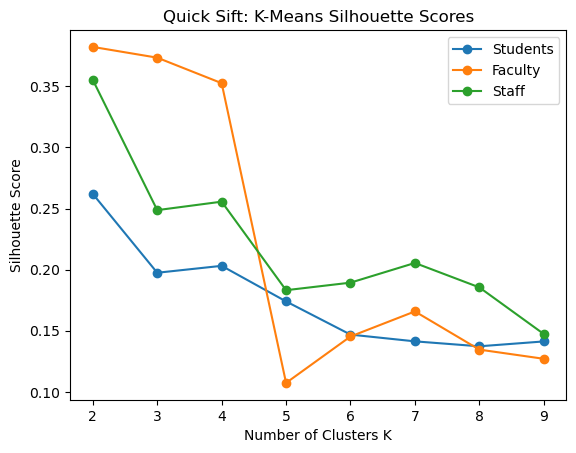

In [ ]:
def kmeans_silhouette(X, k_range=range(2, 10)):
    scores = []
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=42)
        labels = km.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
    return scores

k_range = range(2, 10)
student_scores = kmeans_silhouette(X_students, k_range)
faculty_scores = kmeans_silhouette(X_faculty, k_range)
staff_scores = kmeans_silhouette(X_staff, k_range)

plt.plot(k_range, student_scores, marker='o', label='Students')
plt.plot(k_range, faculty_scores, marker='o', label='Faculty')
plt.plot(k_range, staff_scores, marker='o', label='Staff')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Score')
plt.title('Quick Sift: K-Means Silhouette Scores')
plt.legend()
plt.show()

best_k_students = k_range[np.argmax(student_scores)]
best_k_faculty  = k_range[np.argmax(faculty_scores)]
best_k_staff    = k_range[np.argmax(staff_scores)]

**K-Means:**

In [ ]:
km_students = KMeans(n_clusters=best_k_students, random_state=42)
km_faculty = KMeans(n_clusters=best_k_faculty, random_state=42)
km_staff = KMeans(n_clusters=best_k_staff, random_state=42)

students_clean['cluster'] = km_students.fit_predict(X_students)
faculty_clean['cluster'] = km_faculty.fit_predict(X_faculty)
staff_clean['cluster'] = km_staff.fit_predict(X_staff)

c:\Users\ssang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ssang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ssang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ssang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

This code above uses K-Means to group students, faculty, and staff into clusters. First, it creates a K-Means model for each group, setting the number of clusters to the best value found earlier and using a fixed random state so results are consistent. Then, it fits each model to the respective data (X_students, X_faculty, X_staff) and assigns each person to a cluster. The cluster assignments are saved in a new column called 'cluster' in each dataset. This way, every row now shows which cluster it belongs to, allowing us to see patterns and group similarities within each group.

**Hierarchical Clustering**

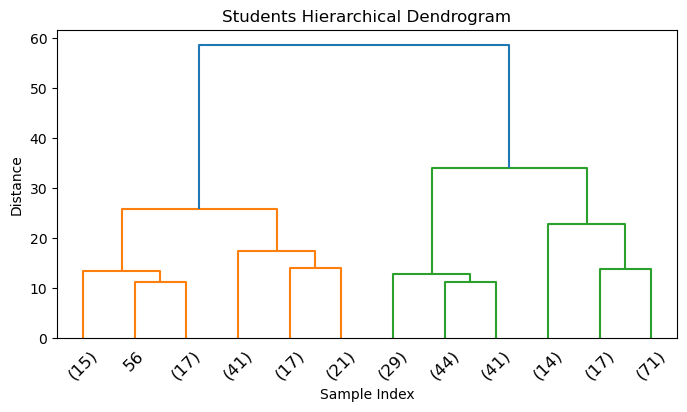

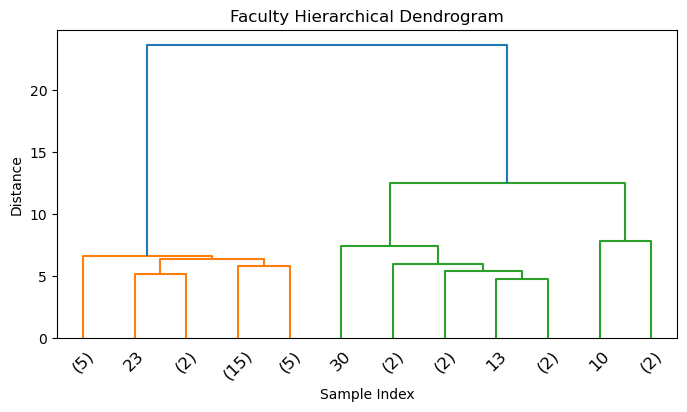

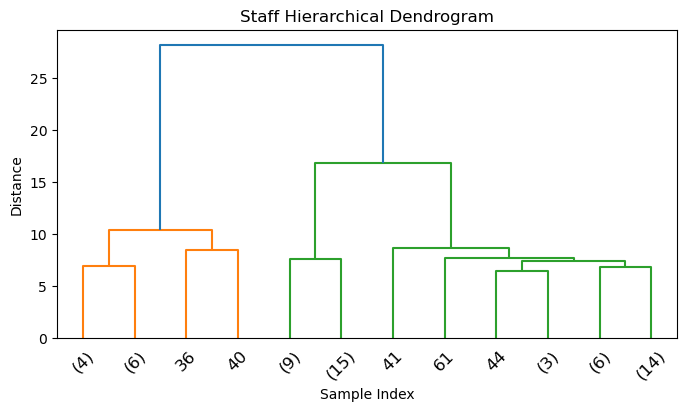

In [136]:
def plot_dendrogram(X, title='Dendrogram'):
    linked = linkage(X, method='ward')
    plt.figure(figsize=(8, 4))
    dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

plot_dendrogram(X_students, 'Students Hierarchical Dendrogram')
plot_dendrogram(X_faculty, 'Faculty Hierarchical Dendrogram')
plot_dendrogram(X_staff, 'Staff Hierarchical Dendrogram')


In [ ]:
def report_clusters(df, label_col='cluster'):
    counts = df[label_col].value_counts()
    print(f"Cluster counts for {label_col}:\n{counts}\n")

for group, df in zip(['Students','Faculty','Staff'], [students_clean, faculty_clean, staff_clean]):
    print(f"--- {group} ---")
    report_clusters(df, 'cluster')
    report_clusters(df, 'h_cluster')

--- Students ---
Cluster counts for cluster:
cluster
1    241
0     87
Name: count, dtype: int64

Cluster counts for h_cluster:
h_cluster
2    218
1    110
Name: count, dtype: int64

--- Faculty ---
Cluster counts for cluster:
cluster
1    28
0    11
Name: count, dtype: int64

Cluster counts for h_cluster:
h_cluster
1    28
2    11
Name: count, dtype: int64

--- Staff ---
Cluster counts for cluster:
cluster
0    50
1    12
Name: count, dtype: int64

Cluster counts for h_cluster:
h_cluster
2    50
1    12
Name: count, dtype: int64



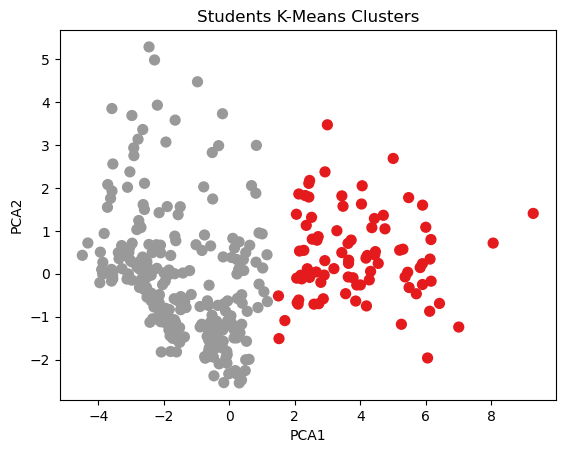

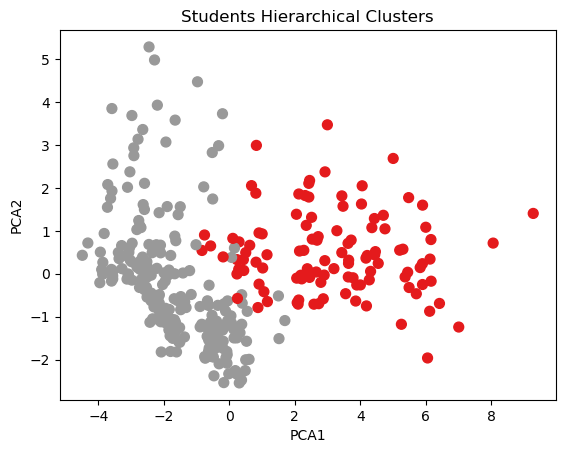

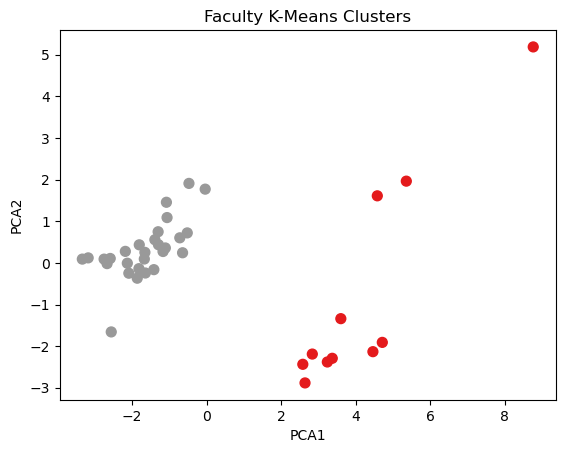

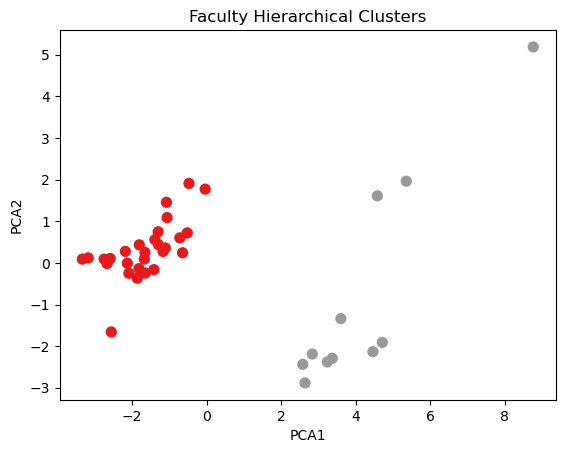

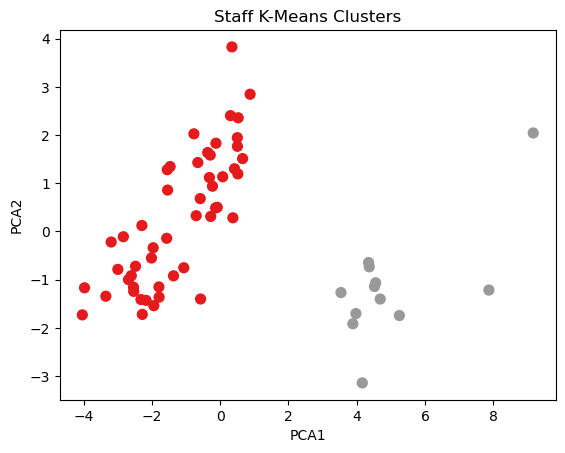

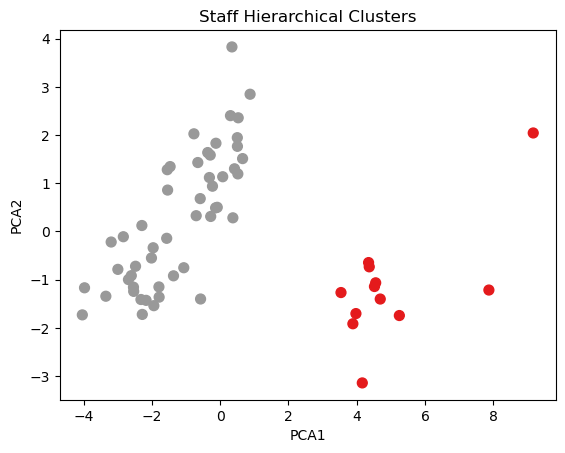

In [ ]:
def plot_clusters(X, labels, title='Clusters'):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Set1', s=50)
    plt.title(title)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()

# Students
plot_clusters(X_students, students_clean['cluster'], 'Students K-Means Clusters')
plot_clusters(X_students, students_clean['h_cluster'], 'Students Hierarchical Clusters')

# Faculty
plot_clusters(X_faculty, faculty_clean['cluster'], 'Faculty K-Means Clusters')
plot_clusters(X_faculty, faculty_clean['h_cluster'], 'Faculty Hierarchical Clusters')

# Staff
plot_clusters(X_staff, staff_clean['cluster'], 'Staff K-Means Clusters')
plot_clusters(X_staff, staff_clean['h_cluster'], 'Staff Hierarchical Clusters')


<span style="color: #4682B4; font-weight: bold;">6. Explainability analysis*</span>

<span style="color: #4682B4; font-weight: bold;">7. Discussion</span>

<span style="color: #4682B4; font-weight: bold;">8. Conclusion</span>